# Assignment 2: Spam Classification with SVM

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (15 pts)

**Data Acquiring:** Download the dataset from https://archive.ics.uci.edu/ml/datasets/Spambase

**Data Splitting:** Put data into the format needed for SVM, then split it into 80% training, 20% testing (each should have approximately the same proportion of position and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard Scikit-Learn library can write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

In [1]:
# You might want to use the following package
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

columnnames = open("spambase.names.txt")
columnlist = []
for line in columnnames:
    columnlist.append(line)
filteredlist = []
for item in columnlist:
    if not(item == '\n' or item[0] =='|' or item[0] == '1'):
        filteredlist.append(item.split(':')[0]) 
# appending the label column name
filteredlist.append("spam")
data = pd.read_csv("spambase.data", header = None, names = filteredlist)
print(data.describe())
from sklearn.utils import shuffle
spamdata = shuffle(data, random_state = 42)
spamdata_Y = spamdata["spam"]
spamdata_X = spamdata.drop(["spam"], axis=1)
corr_matrix = spamdata.corr()
corr_matrix["spam"].sort_values(ascending=False)

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

In [2]:
# Your code goes here for this section.
X_train = [];
y_train = [];
X_test = [];
y_test = [];

X_train, X_test, y_train, y_test = train_test_split(spamdata_X, spamdata_Y, test_size=0.2,stratify=spamdata_Y)
X_train_NS = X_train
X_test_NS = X_test

In [3]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

- - -
## 2. TRAINING SVM FOR SPAM CLASSIFICATION (15 pts)

Run your linear SVM classifier on the training data, and test the resulting model on the test data. In this section, you may use the default **loss function** (hinge) and **default** value of the C hyperparameter (=1.0):

* Report accuracy, precision, recall?
* Create an ROC curve for this SVM on the test data, using 200 or more evenly spaced thresholds. You may use library function calls to create the ROC curve?

**Implementation Notes:** You do NOT need to add a column of 1's to the $\mathbf{
x}$ matrix to have an intercept term

In [4]:
from sklearn.svm import LinearSVC

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_train,y_train)
ypred=svm_clf.predict(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score, recall_score, accuracy_score
auc1 = accuracy_score(y_test, ypred)

pre_sc=precision_score(y_test,ypred,average='binary')
re_sc=recall_score(y_test,ypred,average='binary')
print("Precision: ",pre_sc)
print("Recall: ",re_sc)
print("AUC:",auc1)
    

Precision:  0.9195402298850575
Recall:  0.8815426997245179
AUC: 0.9229098805646037


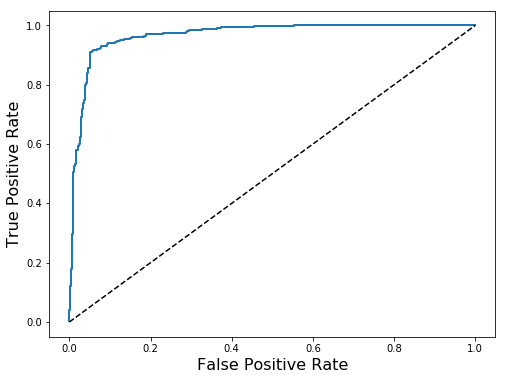

In [5]:
y_scores = svm_clf.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

- - -
## 3. TUNING C FOR LINEAR SVM (15 pts)
In this part of the assignment, you will try using different values of the C parameter with SVMs. Your task is to try different values of C on this dataset. For example, when C is small, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point. When C is large, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data. 

In a 2-D feature space of your choice, you must be able to plot out the decision boundary of SVM for different values of C to earn credit for this section. Depends on your observation on the dataset, you must provide some justifications on the reason you select a certain value of C to tradeoff margin and data violation. 

In [6]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[20]/w[22] * x0 - b/w[22]
    m = 1/w[22]
    up = decision_boundary + m
    down = decision_boundary - m
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, up, "k--", linewidth=2)
    plt.plot(x0, down, "k--", linewidth=2)

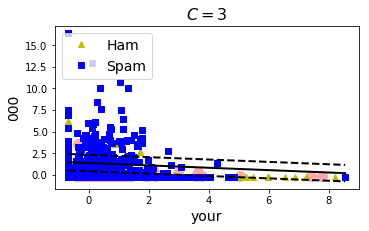

C=3
Accuracy: 0.9218241042345277
Precision: 0.924198250728863
Recall: 0.8732782369146006


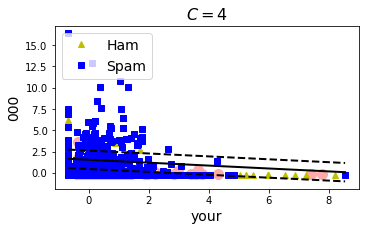

C=4
Accuracy: 0.9218241042345277
Precision: 0.924198250728863
Recall: 0.8732782369146006


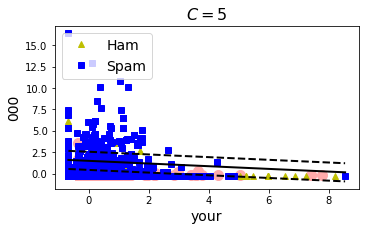

C=5
Accuracy: 0.9207383279044516
Precision: 0.9190751445086706
Recall: 0.8760330578512396


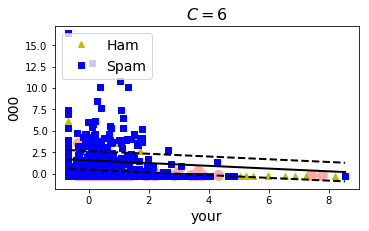

C=6
Accuracy: 0.9218241042345277
Precision: 0.924198250728863
Recall: 0.8732782369146006


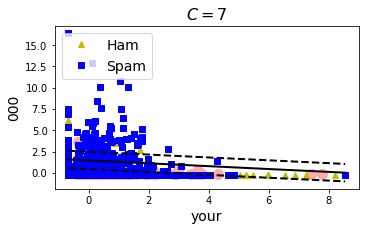

C=7
Accuracy: 0.9185667752442996
Precision: 0.9210526315789473
Recall: 0.8677685950413223


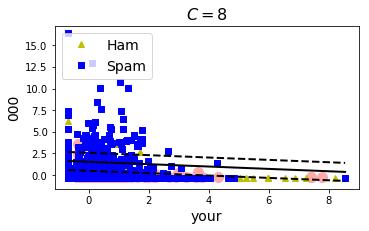

C=8
Accuracy: 0.9174809989142236
Precision: 0.9233038348082596
Recall: 0.8622589531680441


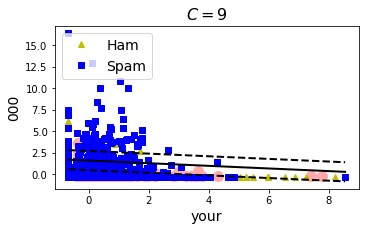

C=9
Accuracy: 0.9185667752442996
Precision: 0.9210526315789473
Recall: 0.8677685950413223


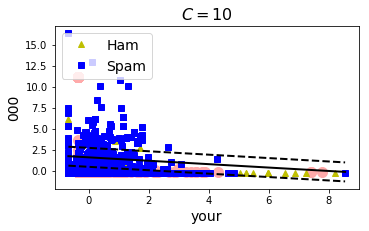

C=10
Accuracy: 0.9196525515743756
Precision: 0.9212827988338192
Recall: 0.8705234159779615


In [7]:
import numpy as np
a=[3,4,5,6,7,8,9,10]
xmin = min(X_train[:, 20])
xmax = max(X_train[:, 20])
ymin = min(X_train[:, 22])
ymax = max(X_train[:, 22])
for i in a:
    svm_clf = LinearSVC(C=i, loss="hinge", random_state=42)
    svm_clf.fit(X_train,y_train)
    y_pred = svm_clf.predict(X_test)
    b1 = svm_clf.decision_function([-scalar.mean_ / scalar.scale_])
    w1 = svm_clf.coef_[0] / scalar.scale_
    svm_clf.intercept_ = np.array([b1])
    svm_clf.coef_ = np.array([w1])
    t = y_train * 2 - 1
    support_vectors_idx1 = (t * (X_train.dot(w1) + b1) < 1).ravel()
    svm_clf.support_vectors_ = X_train[support_vectors_idx1]
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.plot(X_train[:, 20][y_train==0], X_train[:, 22][y_train==0], "y^", label="Ham")
    plt.plot(X_train[:, 20][y_train==1], X_train[:, 22][y_train==1], "bs", label="Spam")
    plot_svc_decision_boundary(svm_clf, xmin, xmax)
    plt.xlabel("your", fontsize=14)
    plt.ylabel("000", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
    plt.axis = (xmin, xmax, ymin,ymax)
    plt.show()
    print("C="+str(i))
    print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
    print("Precision: " + str(precision_score(y_test, y_pred)))
    print("Recall: " + str(recall_score(y_test, y_pred)))

In [8]:
svm_clf = LinearSVC(C=7, loss="hinge", random_state=42)
svm_clf.fit(X_train,y_train)


LinearSVC(C=7, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

**Value of C**

Depending on the dataset, the value for C has been cosen in such a way that it provides a little bit of margin as well as has good precision which will help towards better predications as well as less misclassifications.

I checked accuracy, precision and recall for various values of C ranging from 0.0001 to 1000. I found out the when C=1, it showed the better precision, so working on this I further narrowed by pool for C to 1 to 10 and noticed that best value for C lies between C=5 and C=7.

- - -
## 4. SELECTING THE FEATURES WITH SVM (25 pts)

Once your learned a best linear SVM in previous sections, your task in this section is to select the best features. First, you must * Obtain the weight vector $\mathbf{w}$. Then, for the number of features $n = 2$ to 57, you will run the following (in a loop of course):

* Select the set of $n$ features that have the highest $\mathbf{w}_n$
* Train an SVM, $SVM_n$, on all training data, only using these $n$ features with the same hyperparameter C.
* Test $SVM_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

In one paragraph, discuss the effects of feature selection including the top 5 features.

In [18]:
# Your feature selection code goes here
C = 6
import numpy as np
svm_clf_C1 = LinearSVC(C=6, loss="hinge", random_state=42)
svm_clf_C1.fit(X_train,y_train)
weights = svm_clf_C1.coef_[0] / scalar.scale_


svm_clf_N = LinearSVC(C=0.5, loss="hinge", random_state=42)
accuracy = []
featuresize = []
for n in range(2,58):
    featuresize.append(n)
    maxIndexes = weights.argsort()[-n:][::-1]
    X_train_N = np.empty([X_train.shape[0],len(maxIndexes)])
    X_test_N = np.empty([X_test.shape[0], len(maxIndexes)])
    for i in range(n):
        X = X_train[:,maxIndexes[i]]
        X_t = X_test[:,maxIndexes[i]]
        X_train_N[:,i] = X
        X_test_N[:,i] = X_t
    svm_clf_N.fit(X_train_N,y_train)
    y_pred_N = svm_clf_N.predict(X_test_N)
    accuracy.append(accuracy_score(y_test, y_pred_N) * 100)


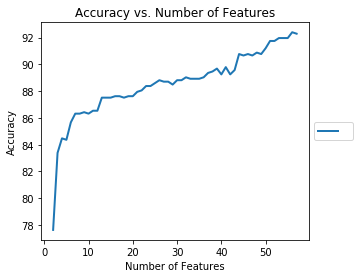

In [19]:
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(featuresize, accuracy, linewidth = 2, label=" ")
    
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs. Number of Features')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
maxAccuracyFeatures = accuracy.index(max(accuracy)) + 1
featuresUsed = weights.argsort()[-maxAccuracyFeatures:][::-1]
featuresUsed = weights.argsort()[-maxAccuracyFeatures:][::-1]
X_train_N = np.empty([X_train.shape[0],len(featuresUsed)])
X_test_N = np.empty([X_test.shape[0], len(featuresUsed)])
for i in range(maxAccuracyFeatures):
    X = X_train_NS[spamdata.columns[featuresUsed[i]]]
    X_t = X_test_NS[spamdata.columns[featuresUsed[i]]]
    X_train_N[:,i] = X
    X_test_N[:,i] = X_t
scaler_N = StandardScaler()
X_train_N = scaler_N.fit_transform(X_train_N)
X_test_N = scaler_N.fit_transform(X_test_N)
svm_clf_N.fit(X_train_N,y_train)
y_pred_N = svm_clf_N.predict(X_test_N)
weightBest = svm_clf_N.coef_[0] / scaler_N.scale_
Top5 = weightBest.argsort()[-5:][::-1]
bestfeatures = []
for index in Top5:
    bestfeatures.append(spamdata.columns[featuresUsed[index]])
bestfeatures

['char_freq_$',
 'word_freq_remove',
 'word_freq_addresses',
 'word_freq_000',
 'word_freq_money']

** Feature Selection:**
Feature Selection helps us decide a  better decision boundary and the margin which overall helps better the predictions by allowing us to assign weights in that respect.

Accuracy increase as number of features increase uptil a certain value and then it drops a little bit.

The Best 5 Features are:

1)char_freq_$

2)word_freq_remove

3)word_freq_addresses

4)word_freq_000

5)word_freq_money

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

Your task is to determine the best $C$ and $\gamma$ hyperparameters to use, run SVM on the spam data and report the performance in metrics similar to section 2. By using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for this dataset. 

Finally, run the version of SVM with the best hyperparameters on the test set, and plot out the comparison in terms of accuracy, precision, and recall, and the ROC curve) to those of linear SVM in Section 3. How much your SVM classifier perform better? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly.




In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid=[{'C':[0.01,0.1,1,10,100], 'gamma':[0.1,1,5,10]}]
svm_clf12=SVC(kernel='rbf', random_state=42)
grid_search= GridSearchCV(svm_clf12,param_grid,cv=5,scoring='roc_auc',return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_
#    # Your code to train and find the best value of C and gamma here

{'C': 1, 'gamma': 0.1}

In [23]:
final_svm=grid_search.best_estimator_
rbf_pred=final_svm.predict(X_test)
accuracy_score(y_test,rbf_pred)*100

90.98805646036917

In [24]:
precision_score(y_test,rbf_pred)

0.945859872611465

In [25]:
recall_score(y_test,y_pred)

0.8705234159779615

In [26]:
final_svm.decision_function(X_test)

array([-4.74535985e-01, -1.66389867e+00,  2.20665434e+00, -8.75383842e-02,
       -7.30118903e-01,  1.95654529e+00,  5.34964397e-01, -1.88533980e+00,
        1.17321573e+00, -2.67784401e-01,  7.51544243e-01, -1.14258249e+00,
       -3.22377627e-01, -2.11649301e+00, -8.11556169e-01, -8.08486930e-01,
       -2.74482623e-01, -4.72893331e-02,  1.44743092e+00, -1.67643036e+00,
        1.49096557e-01,  1.14530820e+00, -1.02762714e+00, -1.75091616e+00,
       -2.80872968e-01, -1.75968854e+00, -1.24523118e-01, -1.57075373e+00,
        1.50066458e+00, -9.38127265e-01, -2.70746404e-01, -1.18443746e+00,
       -8.27789999e-01,  7.04416300e-01, -8.50424656e-01,  8.76402342e-01,
       -6.62265214e-01, -2.24861310e+00,  1.17557062e+00, -3.13055034e-01,
        2.21770105e-01, -7.51507050e-01, -9.82217866e-01, -8.40185887e-01,
       -3.45842300e-01,  1.41346415e+00, -5.81069643e-01, -5.95078514e-01,
       -6.62573818e-01, -5.45707968e-01,  2.93078621e-01, -3.57420948e-01,
       -2.45378253e-01,  

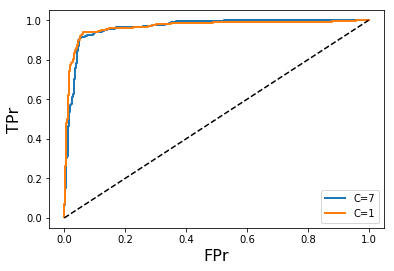

In [27]:
y_score1=final_svm.decision_function(X_test)
fpr1,tpr1,threshold1=roc_curve(y_test,y_score1)
y_score2=svm_clf.decision_function(X_test)
fpr2,tpr2,threshold2=roc_curve(y_test,y_score2)
plt.plot(fpr2,tpr2,linewidth=2,label='C=7')
plt.plot(fpr1,tpr1,linewidth=2,label='C=1')
plt.plot([0,1],[0,1],'k--')
plt.axis=(0,1,0,1)
plt.xlabel('FPr',fontsize=16)
plt.ylabel('TPr',fontsize=16)
plt.legend()
plt.show()

**Comparision**

Accuracy of SVM with Kernel:90.9

Accuracy of SVM without Kernel:92.18

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 2:...".

Best of luck and have fun!